In [34]:
!pip install scipy

In [37]:
from scipy import stats
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Text(0.5, 1.0, 'Gilder GS-11')

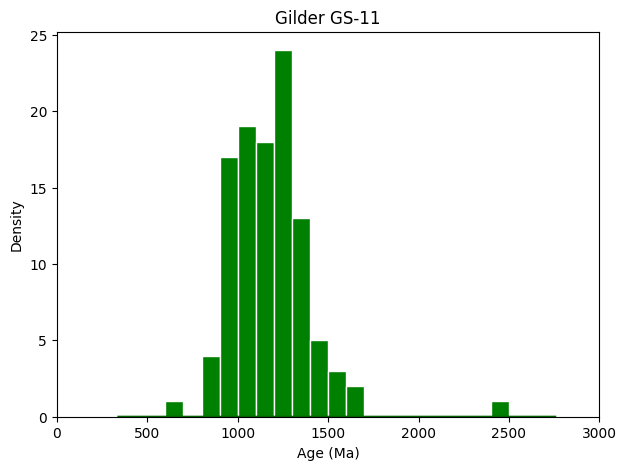

In [38]:
fig,ax = plt.subplots(figsize=(7,5))
plt.hist(data, color='green', edgecolor='white', bins=range(0,3000,100), label='Histogram')
sns.kdeplot(data, color='darkgreen', ax=ax, label='KDE')
plt.xlim(0,3000)
plt.xlabel('Age (Ma)')
plt.title('Gilder GS-11')

Text(0.5, 1.0, 'Gilder GS-11')

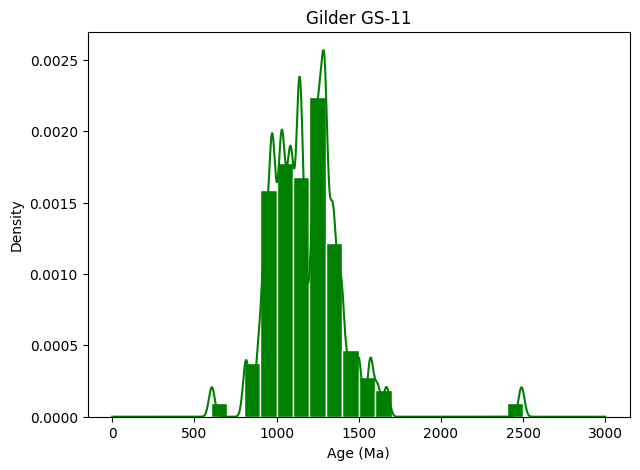

In [121]:
forAgeCalcdf = pd.read_excel('ForAgeCalc.xlsx', usecols=['Gilder GS-11'])
data = forAgeCalcdf['Gilder GS-11'].dropna()

kde = gaussian_kde(data, bw_method=0.08)
x_vals = np.linspace(0, 3000, 1000)
density = kde(x_vals)

fig,ax = plt.subplots(figsize=(7,5))
ax.hist(forAgeCalcdf['Gilder GS-11'], color='green', edgecolor='white', bins=range(0,3000,100), density=True)
ax.plot(x_vals, density, color='green')
plt.xlabel('Age (Ma)')
plt.ylabel('Density')
plt.title('Gilder GS-11')

In [141]:
def kde_hist_grapher_small(file_name, col_name, bw, the_color, edge_color, lower, upper, nums, num_bins, width, height, title):
    dataFrame = pd.read_excel(file_name, usecols=[col_name])
    data = dataFrame[col_name].dropna()
    
    kde = gaussian_kde(data, bw_method=bw)
    x_vals = np.linspace(lower, upper, nums)
    density = kde(x_vals)
    
    fig,ax = plt.subplots(figsize=(width, height))
    ax.hist(dataFrame[col_name], color=the_color, edgecolor=edge_color, bins=range(lower, upper, num_bins), density=True)
    ax.plot(x_vals, density, color=the_color)
    plt.xlabel('Age (Ma)')
    plt.ylabel('Density')
    plt.title(title)

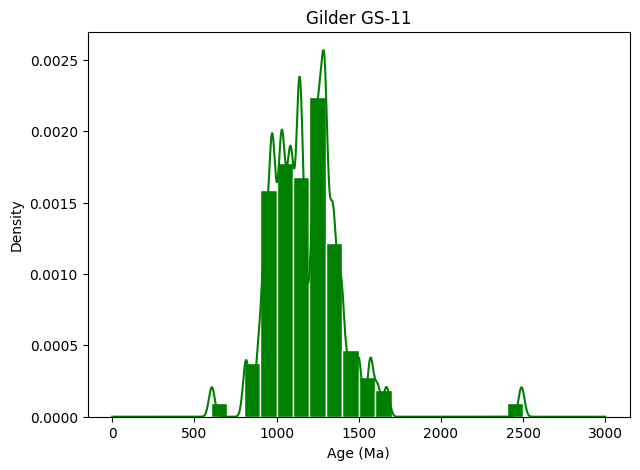

In [142]:
kde_hist_grapher_small('ForAgeCalc.xlsx', 'Gilder GS-11', 0.08, 'green', 'white', 0, 3000, 1000, 100, 7, 5, 'Gilder GS-11')

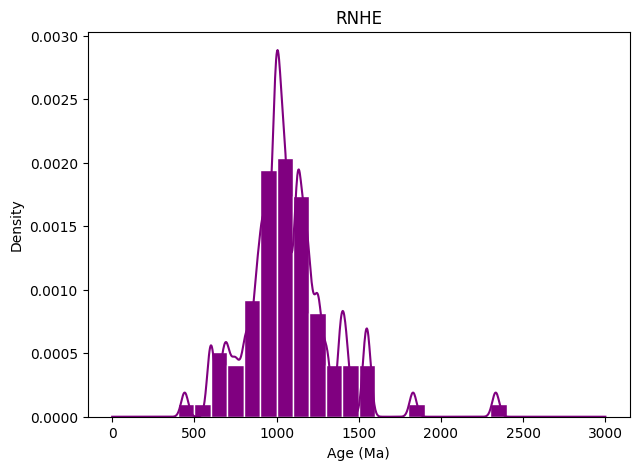

In [124]:
kde_hist_grapher_small('ForAgeCalc.xlsx', 'RNHE', 0.08, 'purple', 'white', 0, 3000, 1000, 100, 7, 5, 'RNHE')

In [325]:
def kde_hist_grapher(file_name, width, height, bw, lower, upper, nums, num_bins, colorList):
    df = pd.read_excel(file_name)
    column_list = df.columns.tolist()
    newList = [column for column in column_list if 'Error' not in column]
    num_samples = len(newList)
    for column, the_color in zip(newList, colorList):
        data = df[column].dropna()
        kde = gaussian_kde(data, bw_method=bw)
        x_vals = np.linspace(lower, upper, nums)
        density = kde(x_vals)
        fig,ax = plt.subplots(figsize=(width, height/num_samples))
        ax.hist(df[column], color=the_color, edgecolor='white', bins=range(lower, upper, num_bins), density=True)
        ax.plot(x_vals, density, color=the_color)
    plt.xlabel('Age (Ma)')

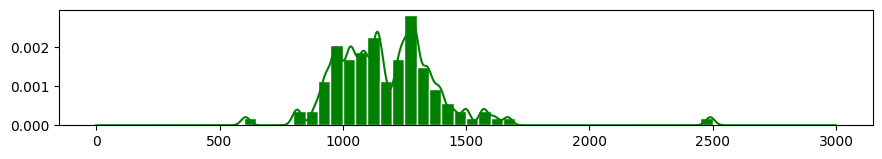

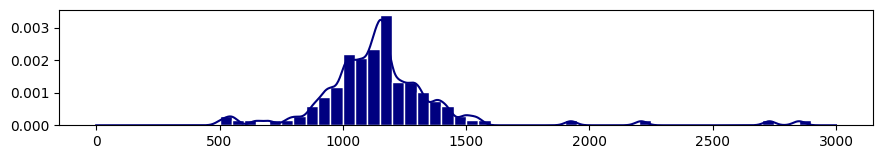

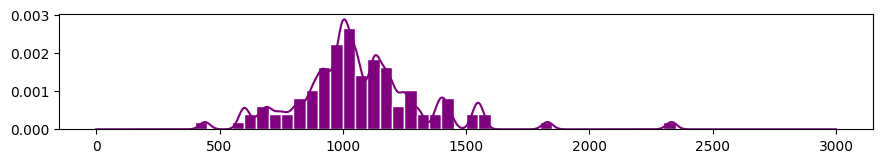

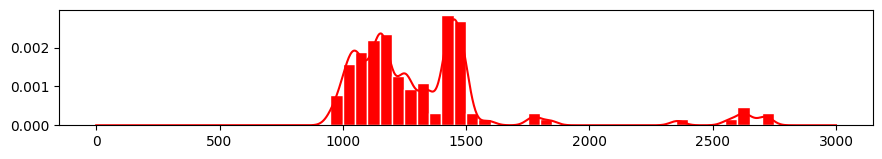

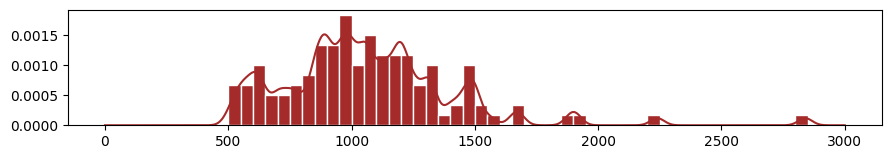

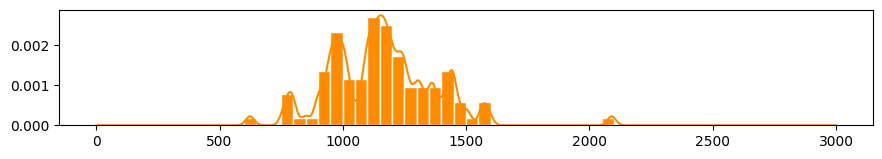

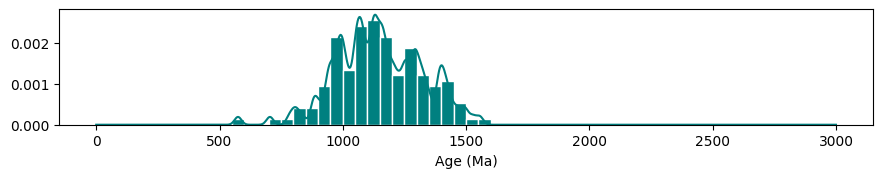

In [326]:
kde_hist_grapher('ForAgeCalc.xlsx', 10.5, 10.5, 0.08, 0, 3000, 1000, 50, ['green','navy','purple','red','brown','darkorange','teal'])

In [336]:
def kde_hist_graph(file_name, width, height, bw, lower, upper, nums, num_bins, colorList):
    df = pd.read_excel(file_name)
    column_list = df.columns.tolist()
    newList = [column for column in column_list if 'Error' not in column]
    num_samples = len(newList)
    for column, the_color in zip(newList, colorList):
        data = df[column].dropna()
        kde = gaussian_kde(data, bw_method=bw)
        x_vals = np.linspace(lower, upper, nums)
        density = kde(x_vals)
        fig,ax = plt.subplots(figsize=(width, height/num_samples))
        ax.hist(df[column], color=the_color, edgecolor='white', bins=range(lower, upper, num_bins), density=True)
        ax.plot(x_vals, density, color=the_color)
        ax.set_title(column + " (n = " + str(len(data)) + ")", x=0.85, y=0.5)
    plt.xlabel('Age (Ma)')

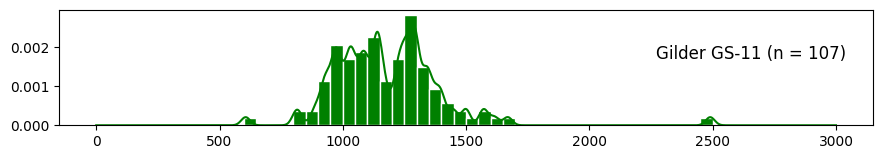

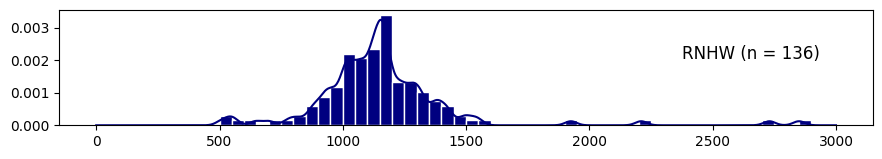

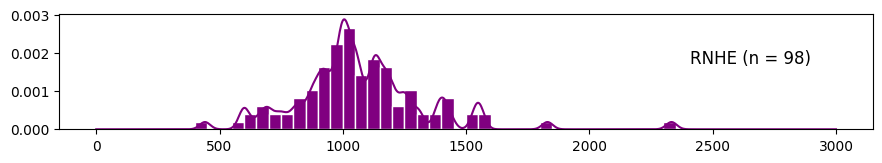

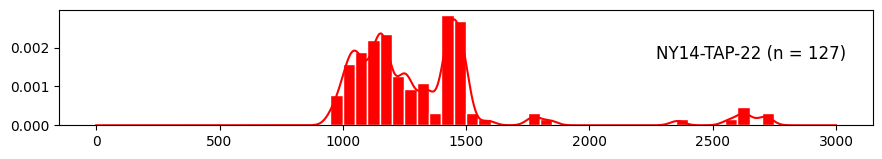

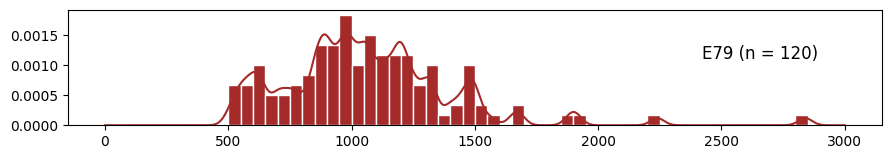

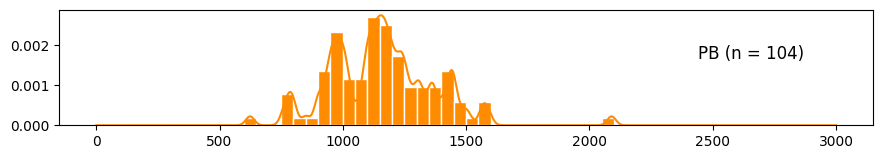

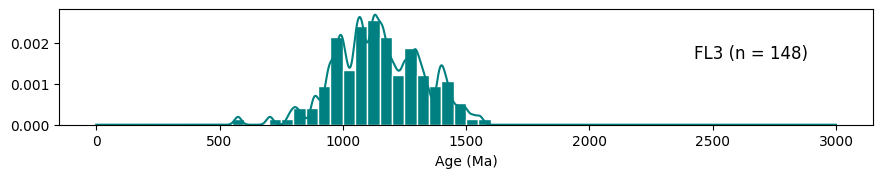

In [337]:
kde_hist_graph('ForAgeCalc.xlsx', 10.5, 10.5, 0.08, 0, 3000, 1000, 50, ['green', 'navy','purple','red','brown','darkorange','teal'])

In [359]:
def kde_hist_grapher(file_name, width, height, bw, lower, upper, nums, num_bins, color_list, hist_input, kde_input):
    df = pd.read_excel(file_name)
    column_list = df.columns.tolist()
    new_list = [column for column in column_list if 'Error' not in column]
    num_samples = len(new_list)
    for column, the_color in zip(new_list, color_list):
        data = df[column].dropna()
        kde = gaussian_kde(data, bw_method=bw)
        x_vals = np.linspace(lower, upper, nums)
        density = kde(x_vals)
        fig,ax = plt.subplots(figsize=(width, height/num_samples))
        if hist_input == True and kde_input == True:
            ax.hist(df[column], color=the_color, edgecolor='white', bins=range(lower, upper, num_bins), density=True)
            ax.plot(x_vals, density, color=the_color)
            ax.set_title(column + " (n = " + str(len(data)) + ")", x=width/12.35, y=height/21)
        elif kde_input == True:
            ax.plot(x_vals, density, color=the_color)
            ax.set_title(column + " (n = " + str(len(data)) + ")", x=width/12.35, y=height/21)
        elif hist_input == True:
            ax.hist(df[column], color=the_color, edgecolor='white', bins=range(lower, upper, num_bins), density=True)
            ax.set_title(column + " (n = " + str(len(data)) + ")", x=width/12.35, y=height/21)
    plt.xlabel('Age (Ma)')

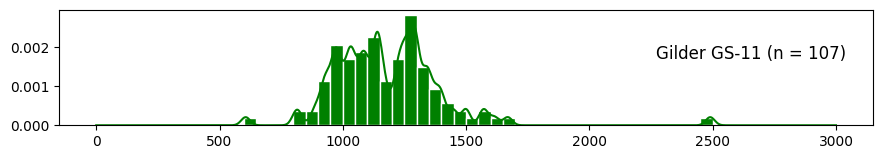

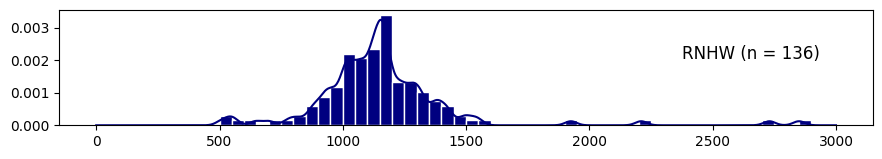

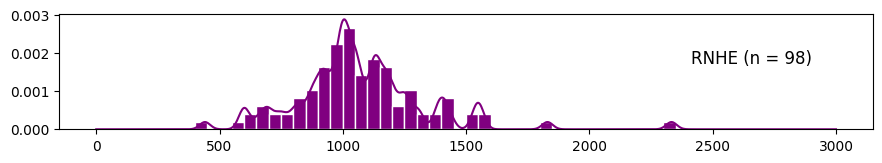

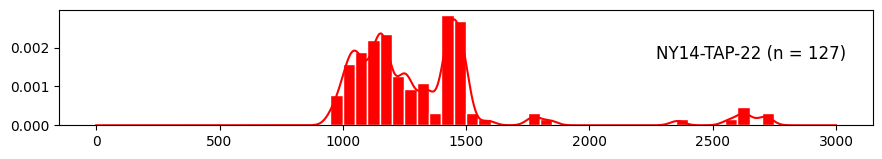

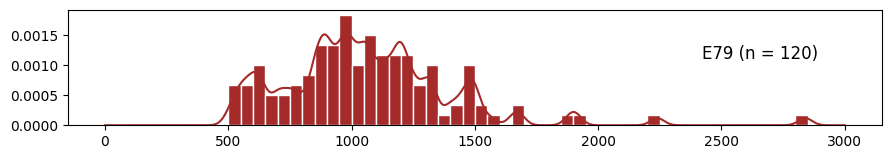

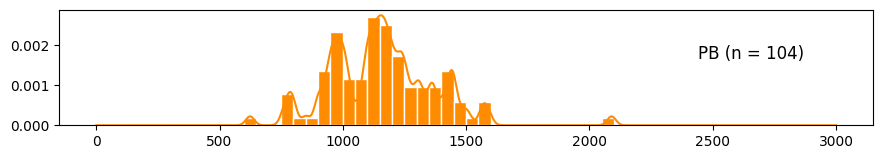

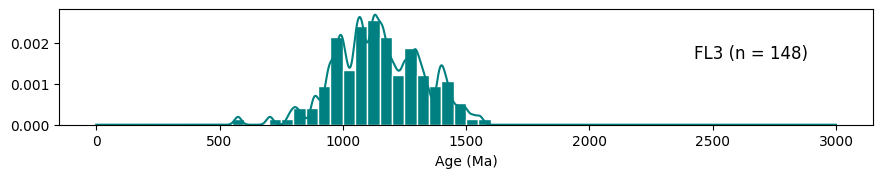

In [363]:
kde_hist_grapher('ForAgeCalc.xlsx', 10.5, 10.5, 0.08, 0, 3000, 1000, 50, ['green', 'navy', 'purple','red','brown','darkorange','teal'], True, True)

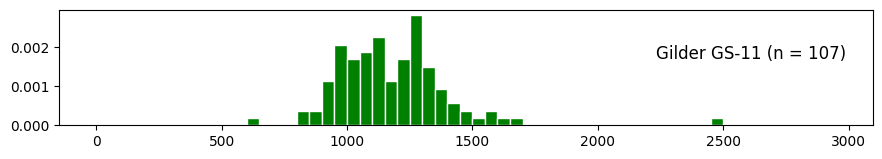

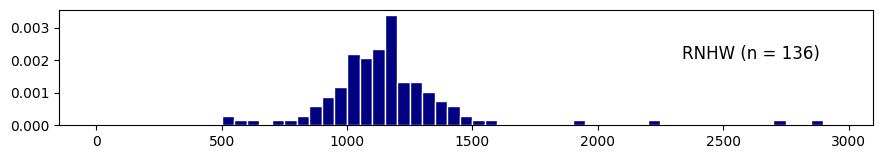

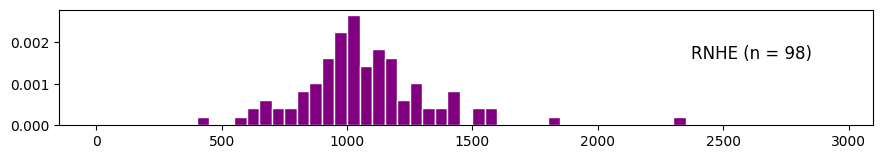

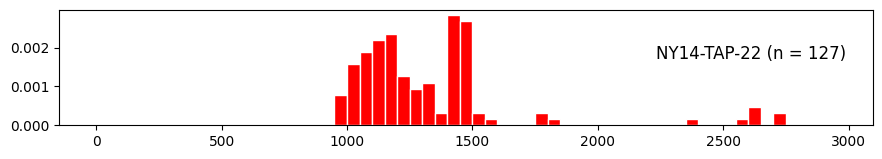

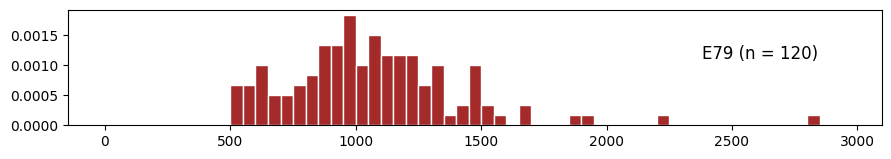

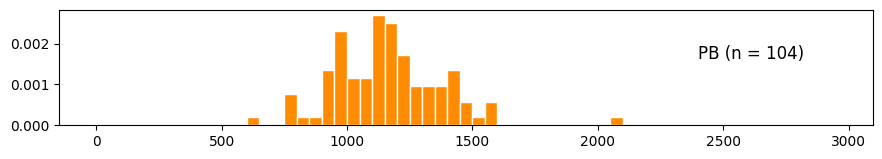

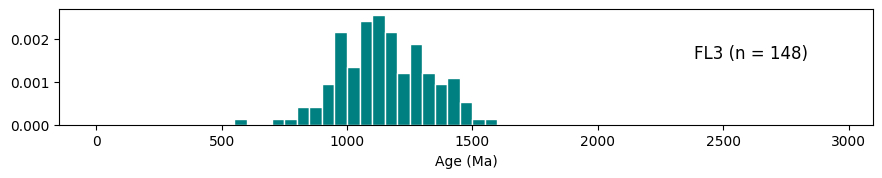

In [361]:
kde_hist_grapher('ForAgeCalc.xlsx', 10.5, 10.5, 0.08, 0, 3000, 1000, 50, ['green', 'navy', 'purple','red','brown','darkorange','teal'], True, False)

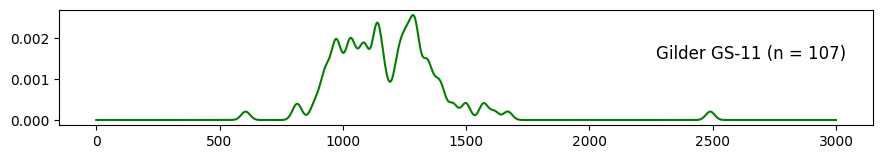

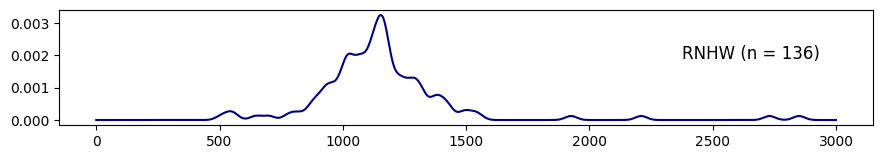

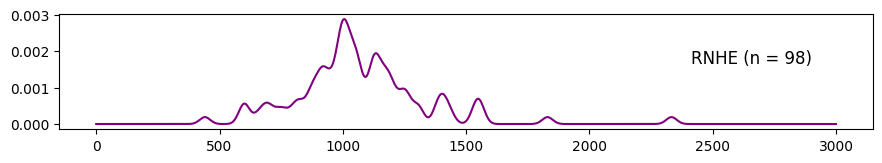

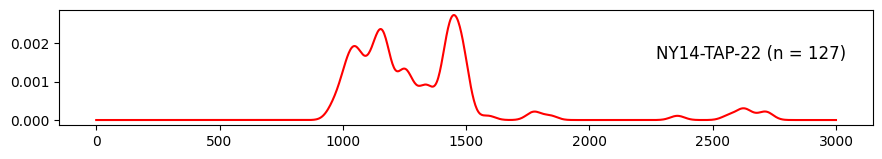

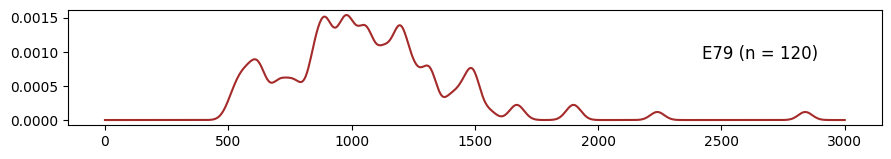

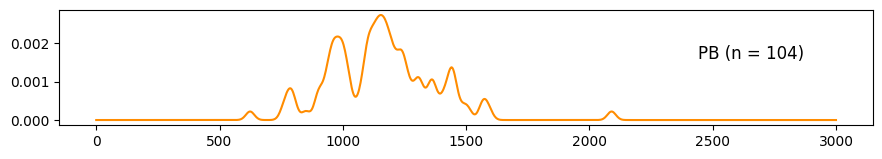

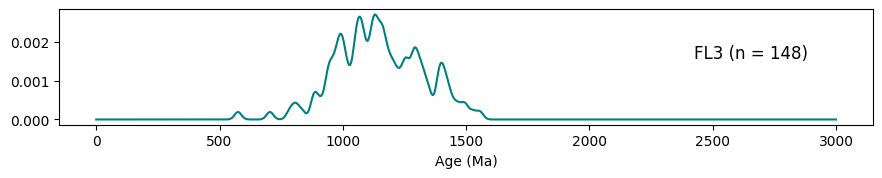

In [362]:
kde_hist_grapher('ForAgeCalc.xlsx', 10.5, 10.5, 0.08, 0, 3000, 1000, 50, ['green', 'navy', 'purple','red','brown','darkorange','teal'], False, True)